## The regression analysis and gender demographics reveal NYC's unique urban dynamics compared to national trends, significantly impacting housing affordability. Rapid population growth, particularly in boroughs like Brooklyn and Manhattan, underscores a pressing demand for housing. This demand, coupled with gender population disparities, necessitates strategic housing policies and urban planning to ensure equitable access to affordable living spaces for all residents, highlighting the critical need for data-driven solutions in addressing urban housing challenges.

In [11]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
api_key = 'YOUR_API_KEY'

In [31]:
import requests
import pandas as pd
import configparser

# Read the configuration file
config = configparser.ConfigParser()
config.read('/Users/NP/Documents/canyouaffordrentinny/Resources/config.ini')

# Get the API key from the configuration file
api_key = config['DEFAULT']['API_KEY']

# Base URL for the ACS5 API
base_url = 'https://api.census.gov/data/{year}/acs/acs5'

# FIPS codes for NYC Boroughs
borough_fips = {
    'Manhattan': '061',
    'Bronx': '005',
    'Brooklyn': '047',
    'Queens': '081',
    'Staten Island': '085'
}

# Variables to fetch - Total male population (B01001_002E) and total female population (B01001_026E)
variables = 'B01001_002E,B01001_026E'

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Year', 'Borough', 'Male Population', 'Female Population', 'Male Percentage', 'Female Percentage'])

# Loop over each year from 2010 to 2020
for year in range(2010, 2021):
    # Loop over each borough
    for borough_name, fips_code in borough_fips.items():
        # Construct the request URL
        request_url = f'{base_url.format(year=year)}?get=NAME,{variables}&for=county:{fips_code}&in=state:36&key={api_key}'
        
        # Make the request
        response = requests.get(request_url)
        
        try:
            # Parse the response as JSON
            data = response.json()
            
            # Skip the header row and extract the data
            if data and len(data) > 1:
                data_row = data[1]
                total_population = int(data_row[1]) + int(data_row[2])
                
                # Create a new DataFrame row
                new_row = pd.DataFrame([{
                    'Year': year,
                    'Borough': borough_name,
                    'Male Population': int(data_row[1]),
                    'Female Population': int(data_row[2]),
                    'Male Percentage': (int(data_row[1]) / total_population) * 100,
                    'Female Percentage': (int(data_row[2]) / total_population) * 100
                }])
                
                # Append the new row to the results DataFrame
                results_df = pd.concat([results_df, new_row], ignore_index=True)
        except ValueError:
            print("Decoding JSON has failed")

# Display the DataFrame
print(results_df)

/var/folders/cy/_nrym7x567b9m_tg6knvmbyw0000gn/T/ipykernel_77073/895723367.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


    Year        Borough Male Population Female Population  Male Percentage  \
0   2010      Manhattan          744303            839042        47.008264   
1   2010          Bronx          639777            725948        46.845229   
2   2010       Brooklyn         1161408           1305374        47.081907   
3   2010         Queens         1063190           1135979        48.345079   
4   2010  Staten Island          224673            238777        48.478369   
5   2011      Manhattan          746858            841399        47.023750   
6   2011          Bronx          644641            729952        46.896863   
7   2011       Brooklyn         1171941           1314178        47.139377   
8   2011         Queens         1071353           1142624        48.390430   
9   2011  Staten Island          226036            239998        48.502041   
10  2012      Manhattan          751244            845491        47.048759   
11  2012          Bronx          650728            735636       

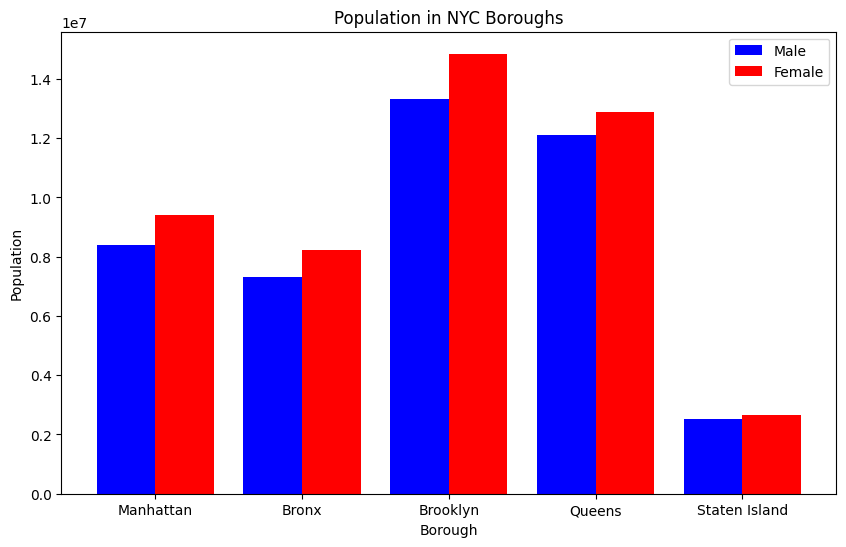

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert columns to correct data type
results_df['Year'] = pd.to_numeric(results_df['Year'], errors='coerce')
results_df['Male Population'] = pd.to_numeric(results_df['Male Population'], errors='coerce')
results_df['Female Population'] = pd.to_numeric(results_df['Female Population'], errors='coerce')

# Handle missing values
results_df = results_df.dropna()

# Remove duplicates
results_df = results_df.drop_duplicates()

# Separate the data for each borough
boroughs = results_df['Borough'].unique()

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart for each borough
for i, borough in enumerate(boroughs):
    borough_data = results_df[results_df['Borough'] == borough]
    ax.bar(i - 0.2, borough_data['Male Population'].sum(), 0.4, color='blue')
    ax.bar(i + 0.2, borough_data['Female Population'].sum(), 0.4, color='red')

# Add a legend
ax.legend(['Male', 'Female'])

# Add title and labels
ax.set_title('Population in NYC Boroughs')
ax.set_xlabel('Borough')
ax.set_ylabel('Population')

# Set x-ticks to be the borough names
ax.set_xticks(range(len(boroughs)))
ax.set_xticklabels(boroughs)

# Show the plot
plt.show()

In [40]:
# Save DataFrame to CSV
results_df.to_csv('/Users/NP/canyouaffordrentinny/Resources/NYC_Gender_Population_Percentages.csv', index=False)

In [42]:
import pandas as pd

# Load your datasets
gender_demographics = pd.read_csv('/Users/NP/canyouaffordrentinny/Resources/NYC_Gender_Population_Percentages.csv')
median_asking_rent = pd.read_csv('/Users/NP/canyouaffordrentinny/Resources/medianAskingRent_All.csv')

# Ensure consistency in the 'Borough' column across datasets for smooth merging
# Convert everything to uppercase as an example of standardization
gender_demographics['Borough'] = gender_demographics['Borough'].str.upper()
median_asking_rent['Borough'] = median_asking_rent['Borough'].str.upper()

# Merge example - merging median asking rent data with gender demographics
merged_data = pd.merge(gender_demographics, median_asking_rent, on='Borough')

# Preliminary look at the merged data
print(merged_data.head())

   Year    Borough  Male Population  Female Population  Male Percentage  \
0  2010  MANHATTAN           744303             839042        47.008264   
1  2010  MANHATTAN           744303             839042        47.008264   
2  2010  MANHATTAN           744303             839042        47.008264   
3  2010  MANHATTAN           744303             839042        47.008264   
4  2010  MANHATTAN           744303             839042        47.008264   

   Female Percentage             areaName   areaType  2010-01  2010-02  ...  \
0          52.991736         All Downtown  submarket   3200.0   3200.0  ...   
1          52.991736          All Midtown  submarket   2875.0   2800.0  ...   
2          52.991736  All Upper East Side  submarket   2450.0   2450.0  ...   
3          52.991736  All Upper Manhattan  submarket   1825.0   1800.0  ...   
4          52.991736  All Upper West Side  submarket   2895.0   2800.0  ...   

   2023-06  2023-07  2023-08  2023-09  2023-10  2023-11  2023-12  2024-01 

In [51]:
for borough in boroughs:
    borough_data = merged_data[merged_data['Borough'] == borough]
    print(f"Data for {borough}:\n", borough_data.head())

Data for MANHATTAN:
    Year    Borough  Male Population  Female Population  Male Percentage  \
0  2010  MANHATTAN           744303             839042        47.008264   
1  2010  MANHATTAN           744303             839042        47.008264   
2  2010  MANHATTAN           744303             839042        47.008264   
3  2010  MANHATTAN           744303             839042        47.008264   
4  2010  MANHATTAN           744303             839042        47.008264   

   Female Percentage             areaName   areaType  2010-01  2010-02  ...  \
0          52.991736         All Downtown  submarket   3200.0   3200.0  ...   
1          52.991736          All Midtown  submarket   2875.0   2800.0  ...   
2          52.991736  All Upper East Side  submarket   2450.0   2450.0  ...   
3          52.991736  All Upper Manhattan  submarket   1825.0   1800.0  ...   
4          52.991736  All Upper West Side  submarket   2895.0   2800.0  ...   

   2023-06  2023-07  2023-08  2023-09  2023-10  2023-

In [52]:
for borough in boroughs:
    borough_data = merged_data[merged_data['Borough'] == borough]
    total_male_population = borough_data.groupby('Year')['Male Population'].sum()
    total_female_population = borough_data.groupby('Year')['Female Population'].sum()
    print(f"Total male population for {borough}:\n", total_male_population)
    print(f"Total female population for {borough}:\n", total_female_population)

Total male population for MANHATTAN:
 Year
2010    28283514
2011    28380604
2012    28547272
2013    28736208
2014    28983854
2015    29238492
2016    29382816
2017    29721396
2018    29341472
2019    29359332
2020    29321446
Name: Male Population, dtype: int64
Total female population for MANHATTAN:
 Year
2010    31883596
2011    31973162
2012    32128658
2013    32264128
2014    32515270
2015    32682774
2016    32746766
2017    33125930
2018    32692768
2019    32656402
2020    32586368
Name: Female Population, dtype: int64
Total male population for BRONX:
 Year
2010    27510411
2011    27719563
2012    27981304
2013    28248635
2014    28573758
2015    28915221
2016    29086920
2017    29482348
2018    29109409
2019    29086791
2020    28916812
Name: Male Population, dtype: int64
Total female population for BRONX:
 Year
2010    31215764
2011    31387936
2012    31632348
2013    31835910
2014    32209580
2015    32504130
2016    32694835
2017    33119030
2018    32719087
2019    

In [53]:
for borough in boroughs:
    unique_values = merged_data[merged_data['Borough'] == borough].nunique()
    print(f"Unique values for {borough}:\n", unique_values)

Unique values for MANHATTAN:
 Year                 11
Borough               1
Male Population      11
Female Population    11
Male Percentage      11
                     ..
2023-11              30
2023-12              33
2024-01              33
2024-02              32
2024-03              31
Length: 179, dtype: int64
Unique values for BRONX:
 Year                 11
Borough               1
Male Population      11
Female Population    11
Male Percentage      11
                     ..
2023-11              20
2023-12              18
2024-01              17
2024-02              16
2024-03              20
Length: 179, dtype: int64
Unique values for BROOKLYN:
 Year                 11
Borough               1
Male Population      11
Female Population    11
Male Percentage      11
                     ..
2023-11              39
2023-12              34
2024-01              39
2024-02              36
2024-03              39
Length: 179, dtype: int64
Unique values for QUEENS:
 Year              

Male fit in BRONX: y = -7371736.91 + 3988.55x, R² = 0.77
Female fit in BRONX: y = -6662671.55 + 3678.36x, R² = 0.73
Male fit in BROOKLYN: y = -12867802.82 + 6987.33x, R² = 0.69
Female fit in BROOKLYN: y = -11243415.05 + 6249.95x, R² = 0.65
Male fit in MANHATTAN: y = -5915766.41 + 3314.95x, R² = 0.78
Female fit in MANHATTAN: y = -3914917.59 + 2367.05x, R² = 0.64
Male fit in QUEENS: y = -8806229.64 + 4916.78x, R² = 0.57
Female fit in QUEENS: y = -7942650.50 + 4522.88x, R² = 0.51
Male fit in STATEN ISLAND: y = -854132.00 + 537.22x, R² = 0.91
Female fit in STATEN ISLAND: y = -993481.86 + 613.68x, R² = 0.85


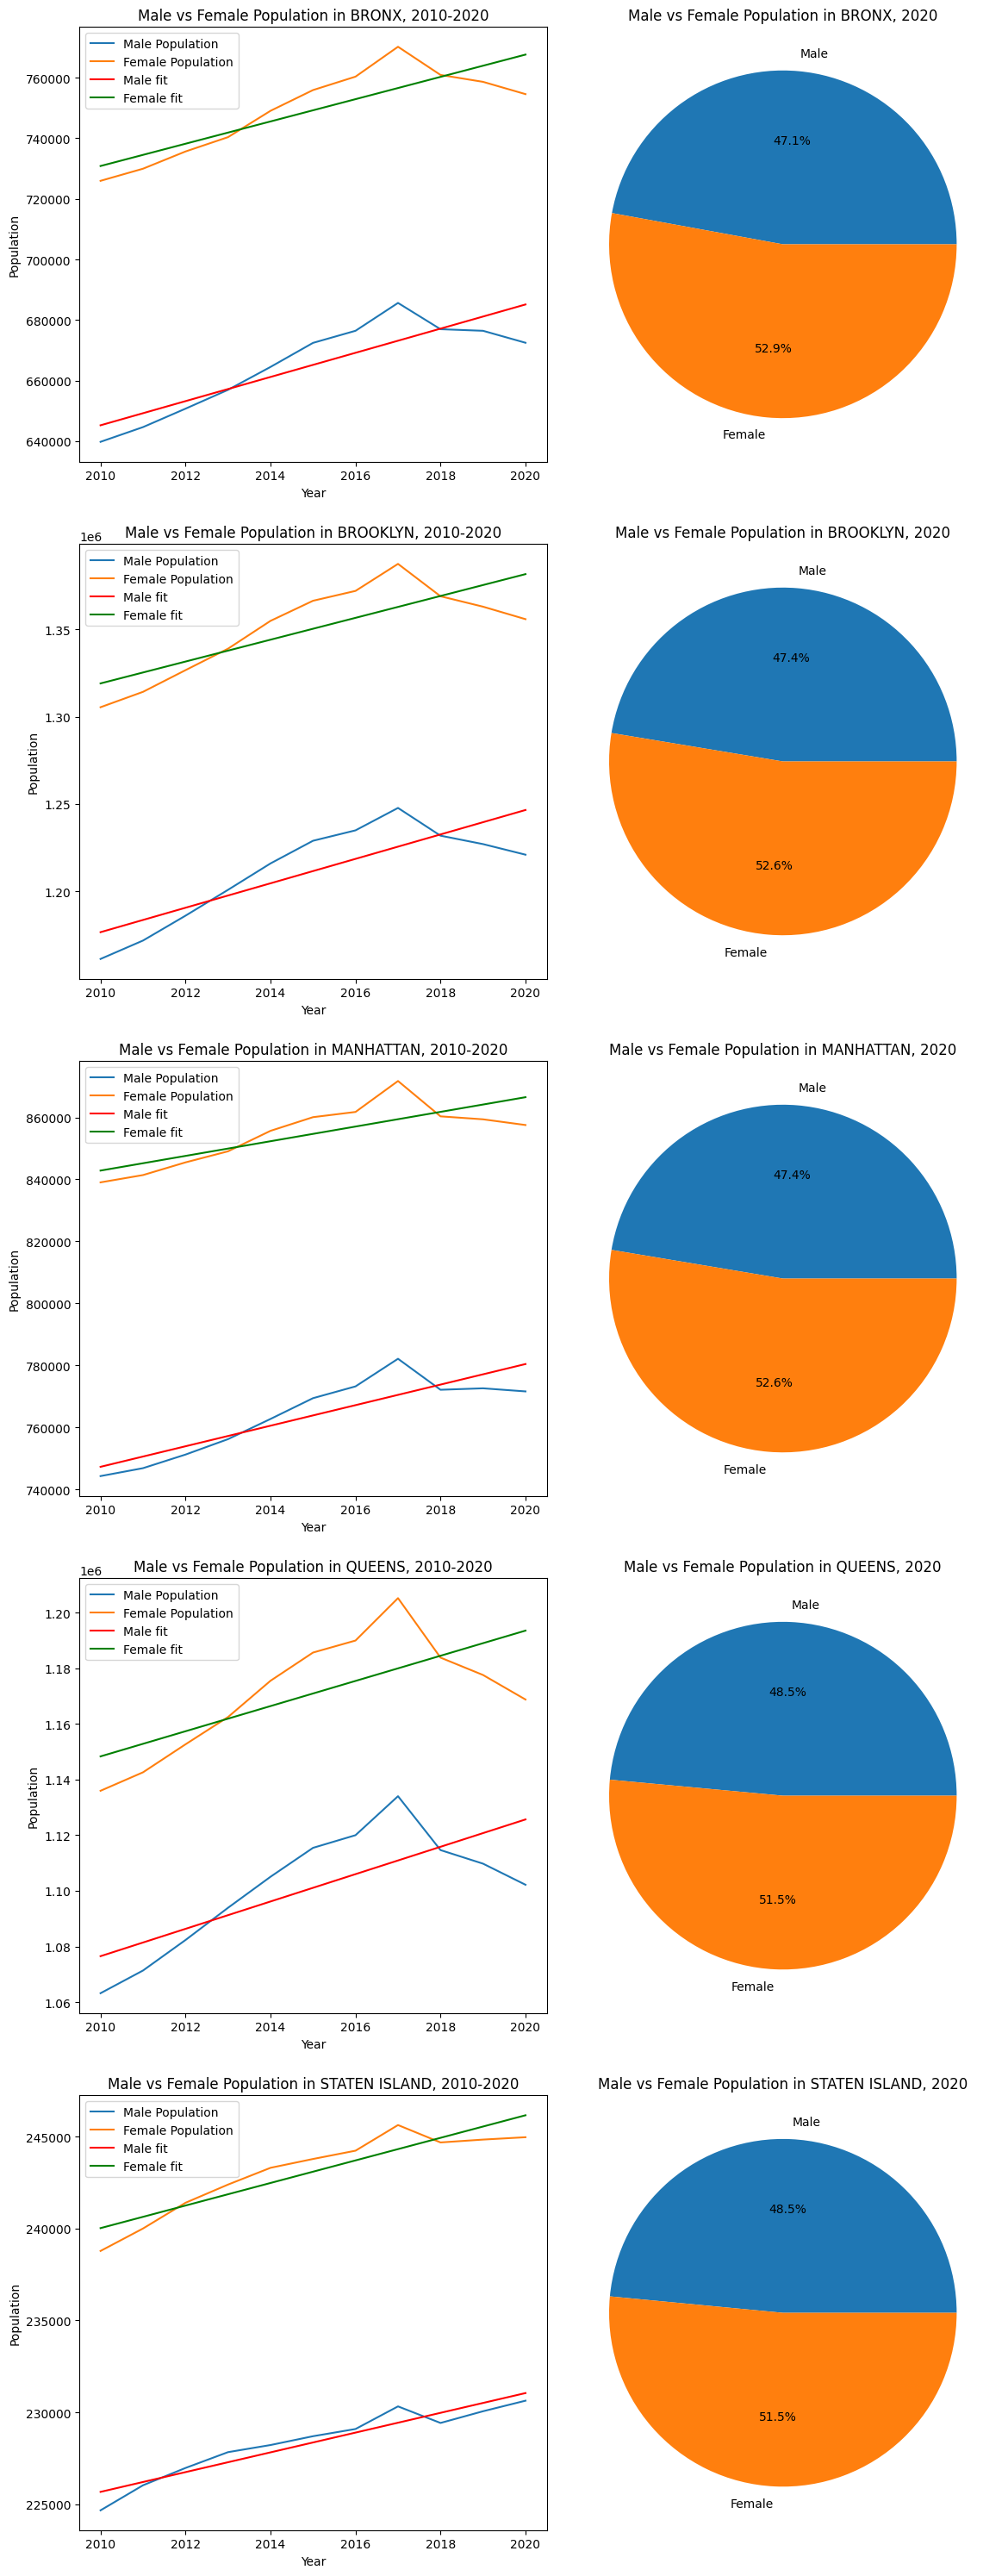

In [62]:
import matplotlib.pyplot as plt
from scipy import stats

# Choose a specific year for the pie charts
year = 2020

# Create a figure with a subplot for each borough (one for the pie chart and one for the line chart)
fig, axs = plt.subplots(len(boroughs), 2, figsize=(12, 6*len(boroughs)))

# Loop over each borough
for i, borough in enumerate(boroughs):
    # Select data for the current borough
    borough_data = merged_data[merged_data['Borough'] == borough]

    # Calculate total male and female population for each year
    total_male_population = borough_data.groupby('Year')['Male Population'].sum()
    total_female_population = borough_data.groupby('Year')['Female Population'].sum()

    # Create a line plot on the first subplot
    axs[i, 0].plot(total_male_population, label='Male Population')
    axs[i, 0].plot(total_female_population, label='Female Population')

    # Perform linear regression for male population
    slope, intercept, r_value, _, _ = stats.linregress(total_male_population.index, total_male_population)
    axs[i, 0].plot(total_male_population.index, intercept + slope * total_male_population.index, 'r', label='Male fit')
    male_fit_info = f'Male fit in {borough}: y = {intercept:.2f} + {slope:.2f}x, R² = {r_value**2:.2f}'

    # Perform linear regression for female population
    slope, intercept, r_value, _, _ = stats.linregress(total_female_population.index, total_female_population)
    axs[i, 0].plot(total_female_population.index, intercept + slope * total_female_population.index, 'g', label='Female fit')
    female_fit_info = f'Female fit in {borough}: y = {intercept:.2f} + {slope:.2f}x, R² = {r_value**2:.2f}'

    axs[i, 0].set_title(f'Male vs Female Population in {borough}, 2010-2020')
    axs[i, 0].set_xlabel('Year')
    axs[i, 0].set_ylabel('Population')
    axs[i, 0].legend()

    # Print the linear regression information to the console
    print(male_fit_info)
    print(female_fit_info)

    # Create a pie chart on the second subplot
    male_population = total_male_population.loc[year]
    female_population = total_female_population.loc[year]
    axs[i, 1].pie([male_population, female_population], labels=['Male', 'Female'], autopct='%1.1f%%')

    axs[i, 1].set_title(f'Male vs Female Population in {borough}, {year}')

# Adjust the layout
plt.tight_layout()
plt.show()


The regression models reveal patterns in population growth by gender across New York City's boroughs with implications for housing affordability. Let's explore these implications:

### General Interpretation

The regression models, represented by the equations y = mx + b, where 'm' is the slope, 'b' is the intercept, and R² is the coefficient of determination, show the relationship between time (as an independent variable) and population size (as a dependent variable) for male and female populations in different boroughs.

- **Slope (m)**: Indicates the average change in population per unit increase in the independent variable (time). A higher slope value suggests a faster growth rate.
- **Intercept (b)**: Represents the estimated population at the starting point of the analysis (where the time variable is zero). This might reflect the baseline population size before the observed period.
- **R² Value**: Represents how well the data fits the model. A higher R² value (close to 1) indicates a strong correlation between time and population size, suggesting that the model explains the variation in population size well.

### Implications for Housing Affordability

1. **Increasing Demand**: Growth in both male and female populations, particularly in boroughs like Brooklyn and Manhattan, indicates increasing demand for housing. This rising demand, in the face of limited supply, is likely to push up housing prices, making affordability a more pressing issue.

2. **Variability in Growth Rates**: Divergent growth rates between male and female populations, as evidenced by the slope values, suggest differing demographic trends that could influence housing preferences and needs. For example, areas with more significant increases in female populations might see higher demand for certain types of housing, impacting market dynamics and potentially prices.

3. **Borough-Specific Trends**:
   - **Bronx & Queens**: Show strong growth in both male and female populations, though with moderate R² values, indicating some variation in growth not explained by time alone. These boroughs might experience pressure on affordable housing but also represent opportunities for housing development initiatives.
   - **Brooklyn & Manhattan**: Exhibiting high growth rates and substantial baseline population sizes (intercept values), these boroughs likely face more acute affordability challenges, exacerbated by desirable locations that attract constant influxes of residents.
   - **Staten Island**: Despite smaller baseline populations (indicated by lower intercept values) and the highest consistency in growth trends (R² values), Staten Island might experience slower impacts on housing affordability. However, it shows a robustly consistent population increase, suggesting a longer-term consideration for housing planning.

4. **Supply vs. Demand Dynamics**: Areas with faster population growth, especially when combined with high R² values indicating consistent year-over-year increases, are likely to see strained housing markets. This can lead to not only higher costs but also lower vacancy rates, making it harder for new entrants to find affordable housing.

5. **Policy and Development Implications**: The analysis underscores the need for targeted housing policies and development strategies that consider both current and projected demographic trends. Ensuring affordable housing availability will require forward-looking planning, considering both supply-side enhancements (e.g., new developments, zoning changes) and demand-side interventions (e.g., subsidies, rent controls).

### Conclusion

The regression analysis vividly illustrates the link between demographic trends and housing market dynamics in New York City's boroughs. As populations grow and evolve, understanding these trends becomes crucial for stakeholders, including policymakers, developers, and residents, to navigate and address the challenges of housing affordability. Tailored, data-driven approaches will be essential in ensuring that the city remains livable and accessible for all its diverse inhabitants.

In [64]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config.ini file
config.read('/Users/NP/Documents/canyouaffordrentinny/Resources/config.ini')

# Get the API key
api_key = config.get('DEFAULT', 'API_KEY')



NYC Male: 4015982.0
NYC Female: 4403334.0
National Male: 159886919.0
National Female: 164810876.0


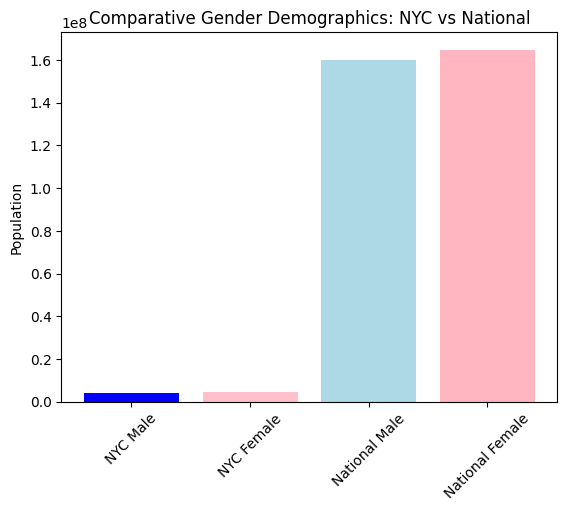

In [70]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import configparser

# Read the API key from config.ini
config = configparser.ConfigParser()
config.read('config.ini')  # Assuming config.ini is in the same directory as your script
api_key = config.get('DEFAULT', 'API_KEY')

year = "2019"
dataset = "acs/acs5"
variables = "B01001_002E,B01001_026E"
geography_nyc = "place:51000&in=state:36"
url_nyc = f"https://api.census.gov/data/{year}/{dataset}?get=NAME,{variables}&for={geography_nyc}&key={api_key}"
url_national = f"https://api.census.gov/data/{year}/{dataset}?get=NAME,{variables}&for=us:1&key={api_key}"

# Fetching NYC data
response_nyc = requests.get(url_nyc)
data_nyc = response_nyc.json()
df_nyc_gender = pd.DataFrame(data_nyc[1:], columns=data_nyc[0])

# Fetching National data
response_national = requests.get(url_national)
data_national = response_national.json()
df_national_gender = pd.DataFrame(data_national[1:], columns=data_national[0])

# Convert numeric columns from string to float
df_nyc_gender[['B01001_002E', 'B01001_026E']] = df_nyc_gender[['B01001_002E', 'B01001_026E']].astype(float)
df_national_gender[['B01001_002E', 'B01001_026E']] = df_national_gender[['B01001_002E', 'B01001_026E']].astype(float)

# Calculate population counts
nyc_male = df_nyc_gender['B01001_002E'].sum()
nyc_female = df_nyc_gender['B01001_026E'].sum()
national_male = df_national_gender['B01001_002E'].sum()
national_female = df_national_gender['B01001_026E'].sum()

# Print population counts
print(f"NYC Male: {nyc_male}")
print(f"NYC Female: {nyc_female}")
print(f"National Male: {national_male}")
print(f"National Female: {national_female}")

# Plotting
labels = ['NYC Male', 'NYC Female', 'National Male', 'National Female']
male_female_counts = [nyc_male, nyc_female, national_male, national_female]

fig, ax = plt.subplots()
bars = plt.bar(labels, male_female_counts, color=['blue', 'pink', 'lightblue', 'lightpink'])

plt.ylabel('Population')
plt.title('Comparative Gender Demographics: NYC vs National')
plt.xticks(rotation=45)
plt.show()

##The provided data outlines the population numbers for New York City (NYC) and compares them with national figures, segmented by gender. This comparison offers an opportunity to delve into the gender demographics of NYC in relation to the broader United States. Here's a detailed analysis:

### NYC Gender Demographics:
- **NYC Male Population**: 4,015,982
- **NYC Female Population**: 4,403,334

In New York City, the data shows a higher female population compared to the male population. This indicates a gender distribution where approximately 52.3% of the population is female, and 47.7% is male, demonstrating a noticeable gender disparity within the city.

### National Gender Demographics:
- **National Male Population**: 159,886,919
- **National Female Population**: 164,810,876

On a national level, the female population also exceeds the male population but with a slightly closer distribution. The national gender distribution shows females constitute approximately 50.8% of the total population, while males make up about 49.2%.

### Analysis and Implications:

1. **Gender Distribution Gap**: Both NYC and the national figures show a higher female than male population, but the gender gap is more pronounced in NYC. This could reflect societal, economic, or cultural factors unique to NYC that influence gender demographics differently than in other parts of the country.

2. **Implications for Housing Affordability in NYC**:
    - **Higher Demand for Housing**: NYC's substantial population, combined with its limited land area, creates a high demand for housing. The slight gender imbalance towards a higher female population might influence housing preferences and demands, potentially affecting the types of housing units in higher demand (e.g., affordable housing, single-occupancy units, family homes).
    - **Policy and Planning Considerations**: Understanding these demographics is crucial for city planners and policymakers to ensure that housing development strategies are inclusive and address the needs of all residents. For example, initiatives could focus on expanding affordable housing options or creating more family-friendly housing solutions.
    - **Socioeconomic Factors**: The gender distribution may also highlight socioeconomic dynamics, such as income disparities or labor market participation rates, which impact housing affordability. For instance, if females in NYC, on average, earn less than males or have different employment rates, this could influence their housing affordability and necessitate targeted policy interventions.

3. **National Context**: Comparing NYC's gender demographics to national figures underscores the city's unique characteristics and challenges. While gender disparities exist both locally and nationally, the concentration of people in urban areas like NYC amplifies issues such as housing affordability and access to services. This comparison highlights the importance of localized solutions in urban policy and planning.

4. **Future Trends**: Monitoring these demographics over time can provide valuable insights for projecting future housing market trends and demands. With changing demographics, evolving economic conditions, and shifting societal norms, the demand for different types of housing and services in NYC will continue to evolve, necessitating adaptive and forward-thinking strategies from city leaders.

### Conclusion:

NYC's gender demographics, particularly when viewed in the context of the national population distribution, provide a critical lens through which to examine housing affordability issues. The noticeable gender disparity, with a higher proportion of females, alongside the city's significant overall population, poses unique challenges and opportunities for urban planning and policy-making aimed at ensuring equitable access to affordable housing and quality services for all residents.